## Campaña de Marketing Bancario


> ### Comprensión empresarial
>
>Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al >banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas >telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro >momento.
>
>### Descripción del problema
>
>El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes >existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus >esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.
>
>Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un >depósito a largo plazo.

## Recopilación de Datos

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
# Modelado
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings

In [240]:
df_inicio = pd.read_csv('/workspaces/sarayruiz---Machine-Learning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df_inicio


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Analisis descriptivo

In [241]:
df_inicio.shape

(41188, 21)

In [242]:
df_inicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [243]:
df_inicio.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


>### Observaciones:
>
> - Tenemos 41188  Filas y 21 Columnas a analizar.
> - Los datos cuentan con 10 características númericas y 11 característica categóricas.
> - Observamos que tenemos a clientes con edad de 98 años. Habría que mirar si es un caso aislado.
> - Que tiene alguna llamada de un max de 82 min, aunque lo normal es que sea una media de 4 min aprox. El 75% de las llamadas es entorno a 5 min.
> - pdays es Número de días que transcurrieron desde la última campaña hasta que fue contactado que todos los valores del 25,5075... den 999 es extraño




## Limpieza de datos

In [244]:
df_inicio.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [245]:
# Veo en primer lugar que datos tenemos en las columnas con datos categoricos. Así determino si esa
# columna la quiero para mi analisis. Voy de una en una aúnque solo aparezca el código de una.

df_inicio['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

## Analisis de variables

> ### Variables Categóricas

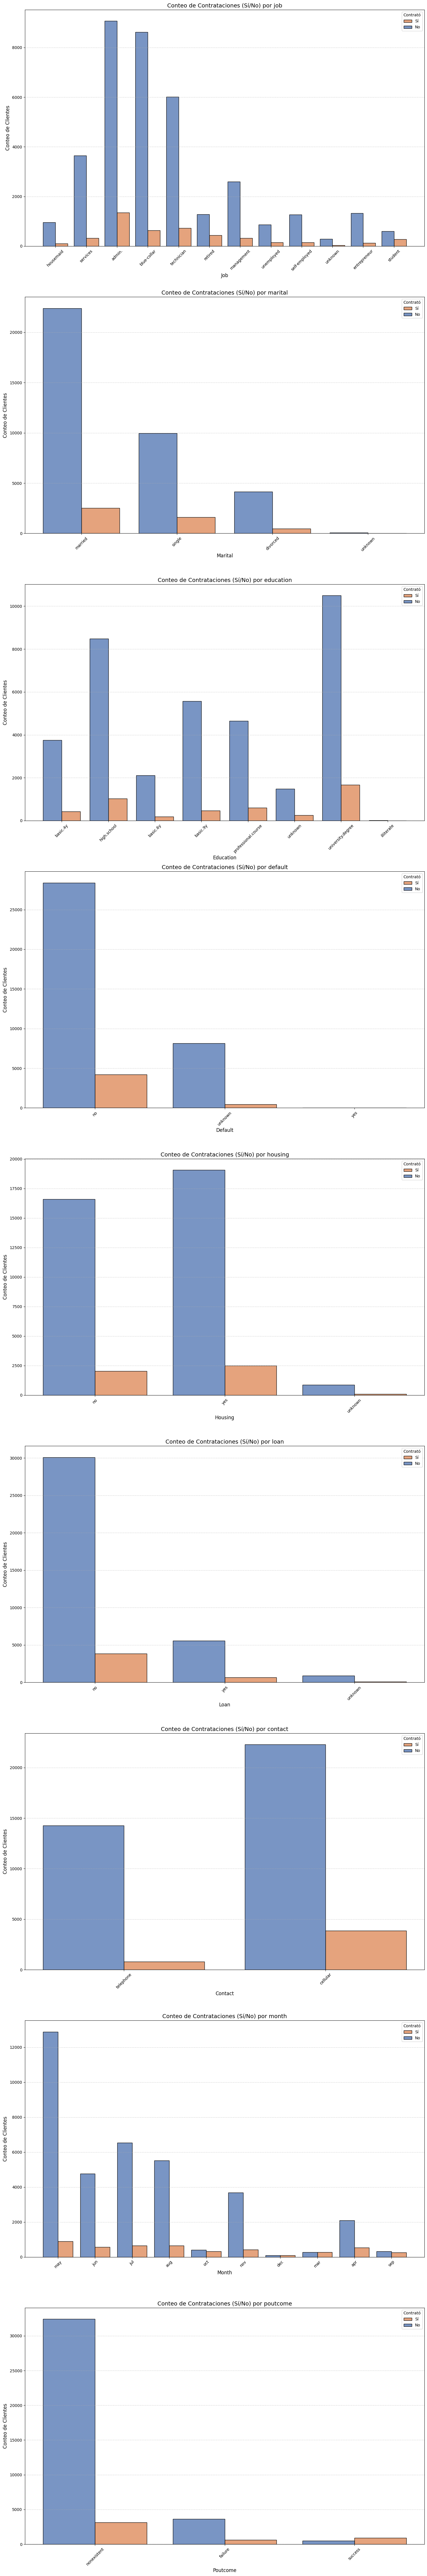

In [246]:
#job. Tipo de trabajo (categórico)
#marital. Estado civil (categórico)
#education. Nivel de educación (categórico)
#default. ¿Tiene crédito actualmente? (categórico)
#housing. ¿Tiene un préstamo de vivienda? (categórico)
#loan. ¿Tiene un préstamo personal? (categórico)
#contact. Tipo de comunicación de contacto (categórico)
#month. Último mes en el que se le ha contactado (categórico)
#poutcome. Resultado de la campaña de marketing anterior (categórico)

cat_colum = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axes = plt.subplots(len(cat_colum), 1, figsize=(15, 10 * len(cat_colum)))

for i, col in enumerate(cat_colum):
    
    sns.histplot(data=df_inicio, x=col, hue='y', multiple="dodge", shrink=.8, ax=axes[i], palette='deep')
    
    axes[i].tick_params(axis='x', rotation=45) 
    axes[i].set_title(f'Conteo de Contrataciones (Sí/No) por {col}', fontsize=14)
    axes[i].set_ylabel('Conteo de Clientes', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    
    axes[i].legend(title='Contrató', labels=['Sí', 'No'], loc='upper right')

plt.tight_layout()
plt.show()

> Observaciones:
>
> - Ha groso modo podemos decir que las personas que más depositos contratan son:
administrativos, tecnicos, obreros, casados, solteros, con estudios superiores, no tienen prestamos ni créditos, son contactados por móvil.
> - Hay una equidad entre personas que tienen hipotecas a la hora de contratar.
> - Los meses que más contrataciones hay son los de primavera y verano.
> - Sobre la campaña anterior, hubo contrataciones nuevas de clientes que no se registraron en la anterior y clientes que volvieron a contratar en esta campaña.

> ### Variables numéricas

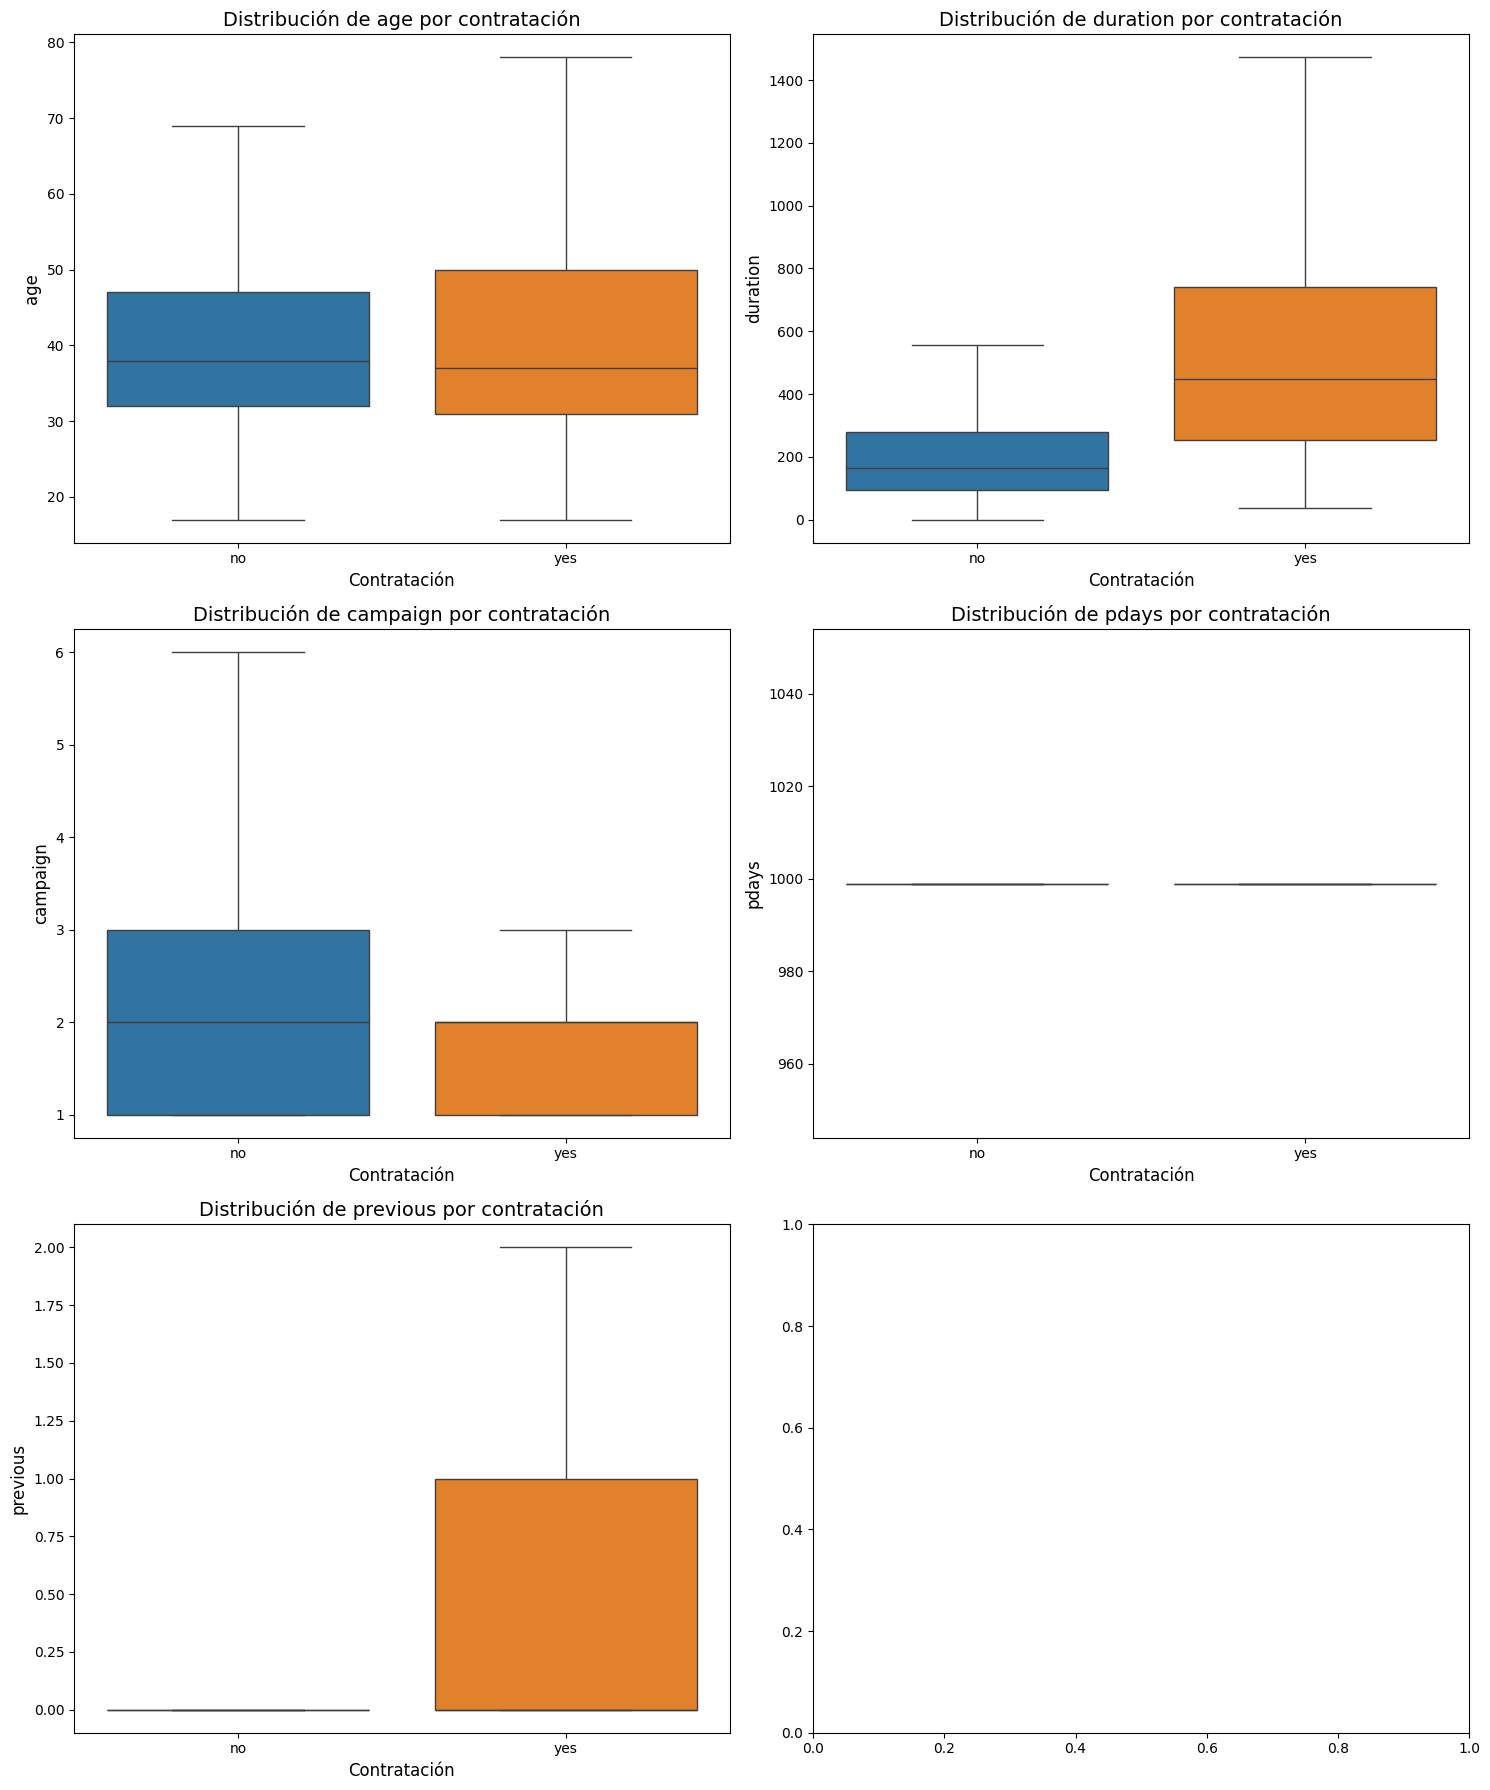

In [247]:
# Columnas numéricas clave
#age. Edad del cliente (numérico)
#duration. Duración del contacto previo en segundos (numérico)
#campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
#pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
#previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)

num_colum = ['age', 'duration', 'campaign','pdays','previous']
n_columnas = 2
n_filas = math.ceil(len(num_colum) / n_columnas)

fig, axes = plt.subplots(n_filas, n_columnas,figsize=(15, 6 * n_filas))

axes = axes.flatten()

for i, col in enumerate(num_colum):
    sns.boxplot(data=df_inicio, hue='y', x='y', y=col, ax=axes[i],
                showfliers=False) # Ocultar outliers extremos para mejor visualización
    
    axes[i].set_title(f'Distribución de {col} por contratación', fontsize=14)
    axes[i].set_xlabel('Contratación', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

> Observaciones:
>- En tema de edad el nº de contrataciones del deposito estan algo equiparadas.
>- Las llamadas de más larga duración tuvieron más contrataciones que las cortas.
>- A los clientes que se le han vuelto a contactar de la campaña anterior han vuelto a contratar. 


> Hacemos Factorize de todo el df inicial para poder hacer el mapa de correlaciones.

In [248]:
df_inicio

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [249]:
cat_colum = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
             'day_of_week', 'poutcome','y']

df_facto = df_inicio.copy()
for col in cat_colum:
    df_facto[col] = pd.factorize(df_facto[col])[0]

df_facto

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,0,1,0,1,5,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [250]:
with open('../data/processed/factordata.pkl', 'wb') as file:
    pickle.dump(df_facto, file)


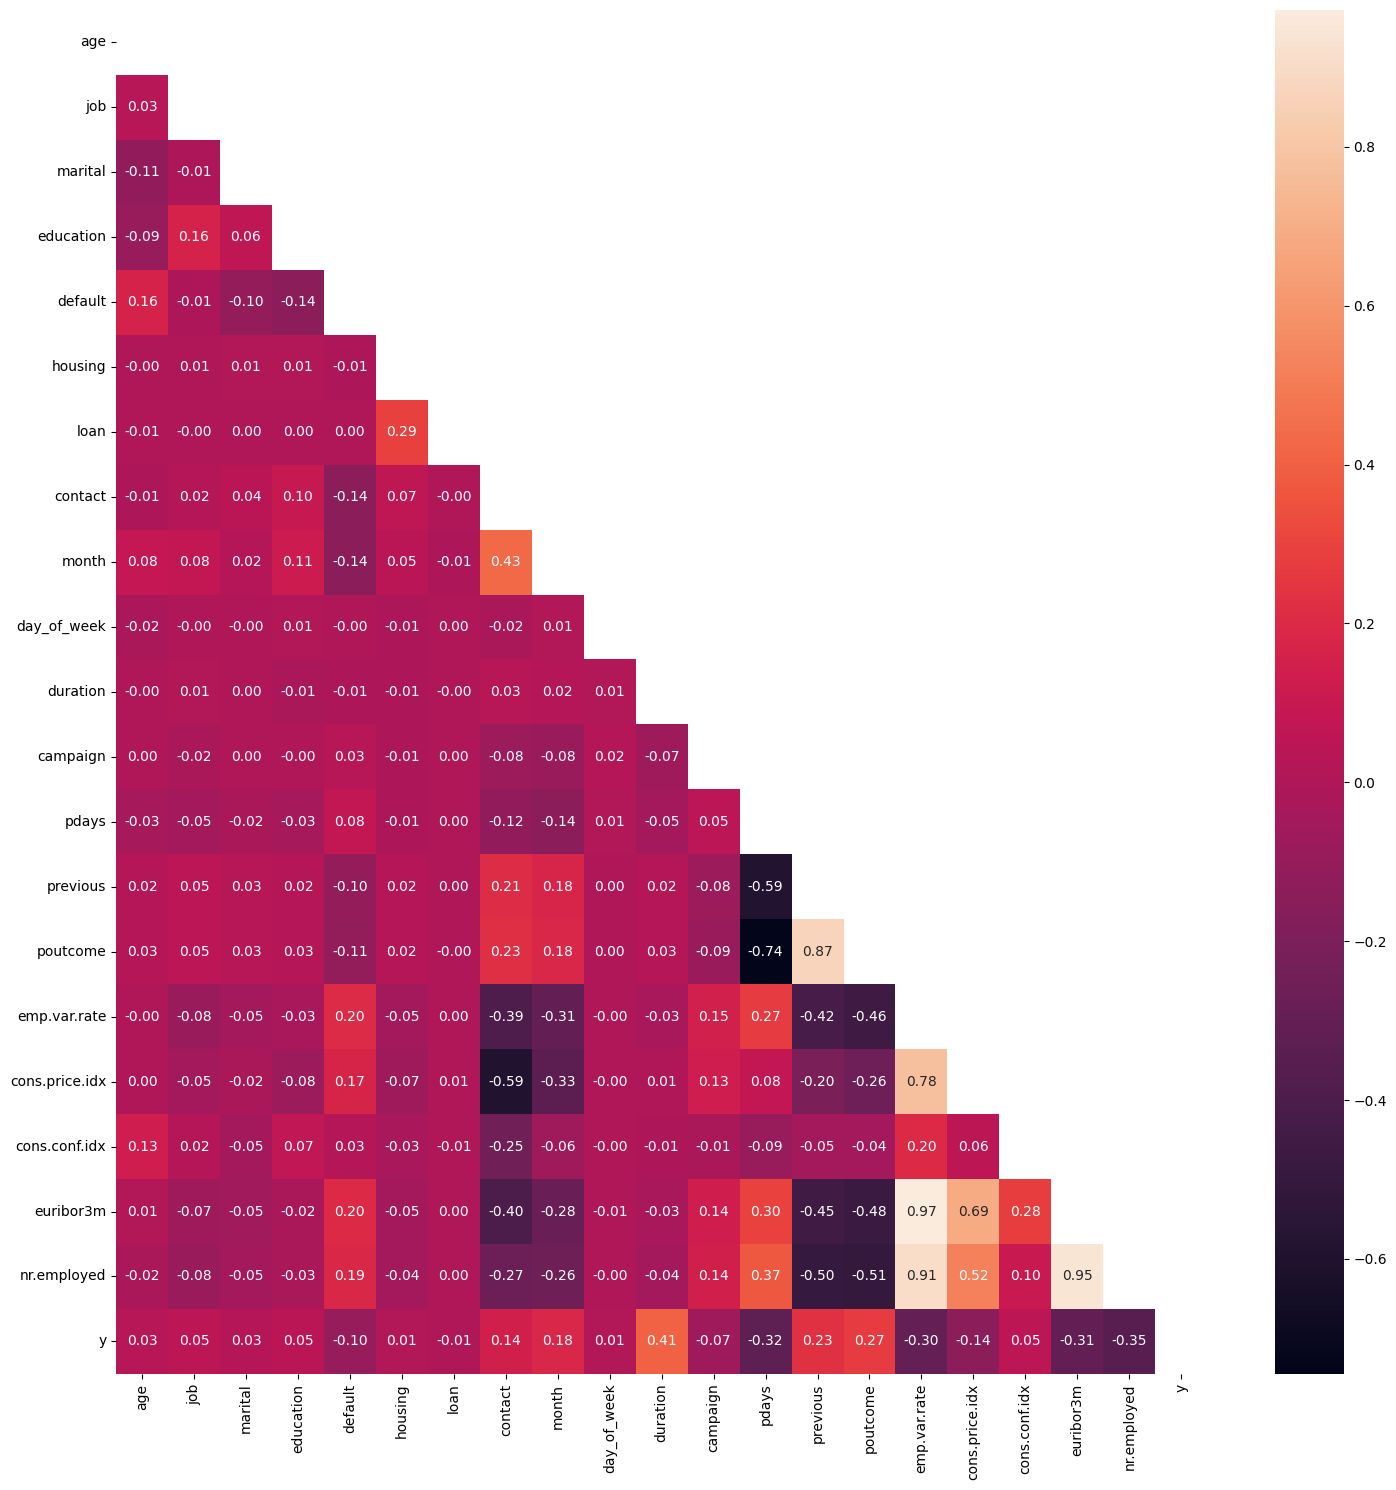

In [251]:
corr = df_facto.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

## Ingeniería de características.

> Columnas a eliminar:
>
>- day_of_week: el día de la ultima llamada no es determinante para la contratacion de deposito.
>- pdays: el nº de dias transcurrido entre llamadas tampoco es determinante para la cto del depo.
>- previous: El numero de llamadas realizadas durante la campaña anterior tampoco determinará el resultado de esta.
>- cons.price.idx, cons.conf.idx, euribor3m, nr.employed, emp.var.rate: no son valores que nos afecte a la horade la contratación de un nuevo deposito.


In [252]:
df_facto.drop(['day_of_week','pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 
               'nr.employed', 'emp.var.rate'], axis=1, inplace=True)

In [253]:
df_facto.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.0,32.0,38.0,47.0,98.0
job,41188.0,3.673691,2.454116,0.0,2.0,3.0,4.0,11.0
marital,41188.0,0.510634,0.696779,0.0,0.0,0.0,1.0,3.0
education,41188.0,3.277532,2.185525,0.0,1.0,3.0,6.0,7.0
default,41188.0,0.208872,0.406686,0.0,0.0,0.0,0.0,2.0
housing,41188.0,0.571914,0.541209,0.0,0.0,1.0,1.0,2.0
loan,41188.0,0.199767,0.456002,0.0,0.0,0.0,0.0,2.0
contact,41188.0,0.634748,0.481507,0.0,0.0,1.0,1.0,1.0
month,41188.0,2.250097,2.429079,0.0,0.0,2.0,3.0,9.0
duration,41188.0,258.285010,259.279249,0.0,102.0,180.0,319.0,4918.0


>Observaciones:
>
>La columna Default tiene un media de 0.21 cuando su 25% es de 0 y tu 75% también.
>Loan, poutcome, también lo miraremos por datos similares.

> ### Outliers: Visualización
>
>Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos que se salen de las regiones de confianza:

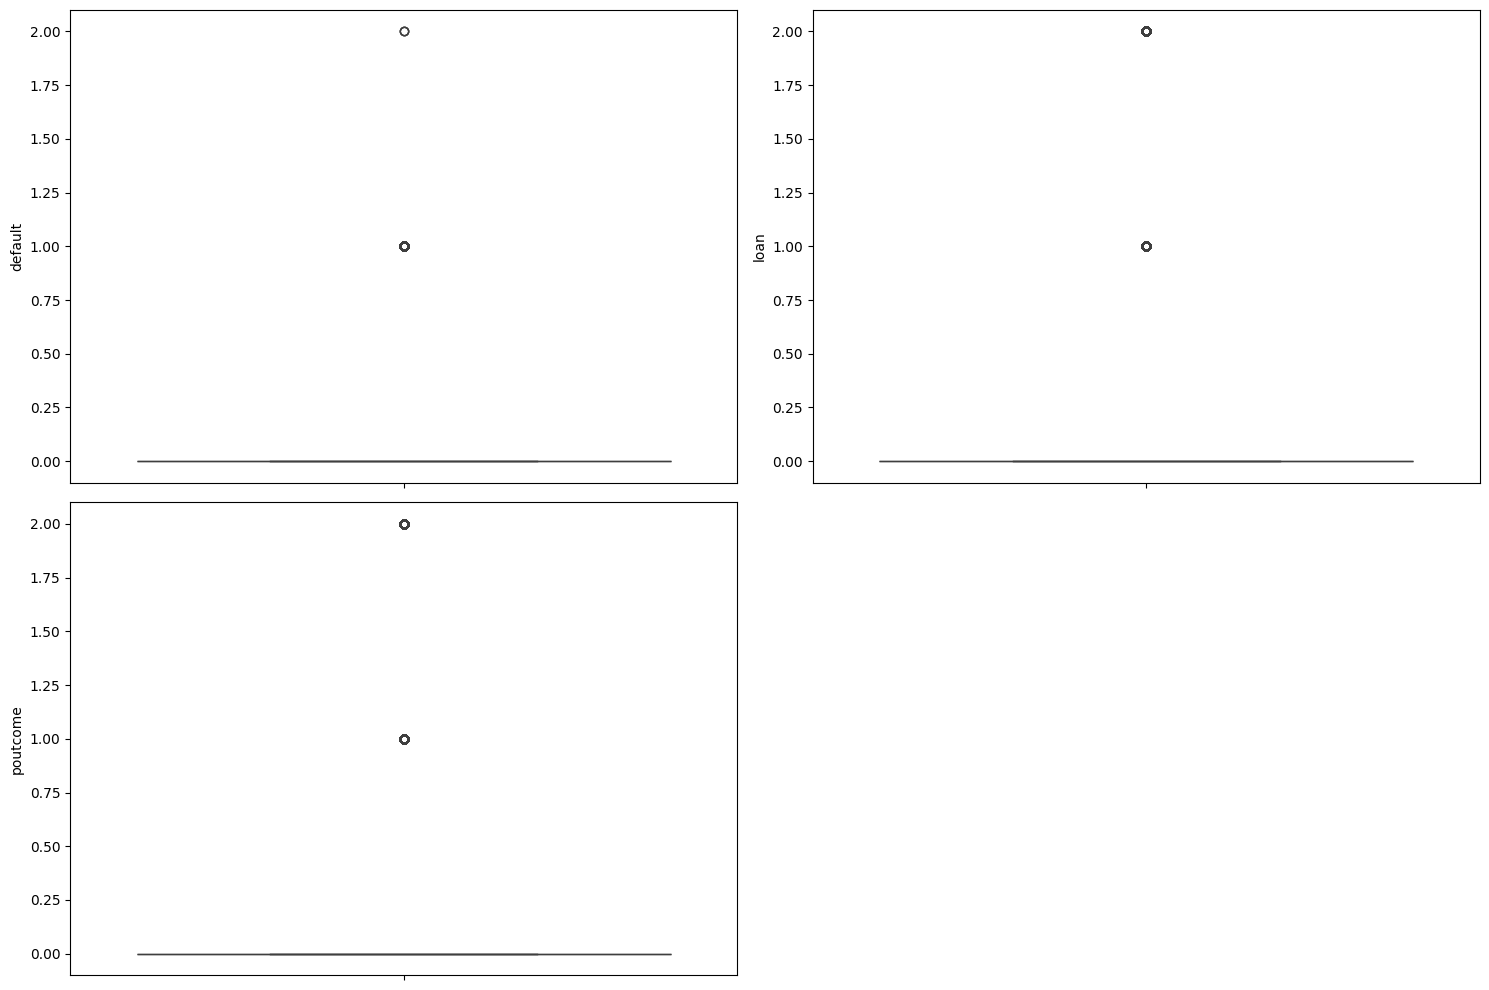

In [254]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df_facto, y="default")
sns.boxplot(ax=axis[0, 1], data=df_facto, y="loan")
sns.boxplot(ax=axis[1, 0], data=df_facto, y="poutcome")
fig.delaxes(axis[1, 1])

plt.tight_layout()
plt.show()

In [255]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df_facto["poutcome"].quantile(0.25)
q3 = df_facto["poutcome"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 0.0, límite inferior: 0.0, rango intercuartílico: 0.0'

In [256]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df_facto["loan"].quantile(0.25)
q3 = df_facto["loan"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 0.0, límite inferior: 0.0, rango intercuartílico: 0.0'

In [257]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df_facto["default"].quantile(0.25)
q3 = df_facto["default"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 0.0, límite inferior: 0.0, rango intercuartílico: 0.0'

> #### Conclusión
>
> Basándonos en estos resultados, no voy a eliminar dichas columnas.

In [258]:
#Comprobamos que no tenemos ningun valor faltante.

df_facto.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
poutcome     0
y            0
dtype: int64

> #### Inferencia de nuevas características
>
> Cómo default y loan hablan sobre crédito o pto personal (que casi que es lo mismo) y tienen aprox la misma media. decido unificarla en una sola.

In [259]:
df_facto['credit'] = df_facto['default'] + df_facto['loan']
df_facto.drop(['default', 'loan'], axis=1, inplace=True)
df_facto.head()

,age,job,marital,education,housing,contact,month,duration,campaign,poutcome,y,credit
0,56,0,0,0,0,0,0,261,1,0,0,0
1,57,1,0,1,0,0,0,149,1,0,0,1
2,37,1,0,1,1,0,0,226,1,0,0,0
3,40,2,0,2,0,0,0,151,1,0,0,0
4,56,1,0,1,0,0,0,307,1,0,0,1


## Split

In [260]:
#Elimino las mismas columnas que del df factorizado
df_inicio.drop(['day_of_week','pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 
               'nr.employed', 'emp.var.rate'], axis=1, inplace=True)

In [261]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_inicio.drop('y', axis=1)
y = df_inicio['y']

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [262]:
y_train

11348    yes
38879     no
24510     no
38865     no
25238     no
        ... 
5294      no
1726      no
35653     no
25720     no
28947    yes
Name: y, Length: 32950, dtype: object

In [263]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [264]:
y_test.shape

(8238,)

In [265]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome
11348,55,retired,married,university.degree,unknown,yes,no,telephone,jun,1012,1,nonexistent
38879,34,management,married,university.degree,no,no,no,cellular,nov,75,1,nonexistent
24510,53,housemaid,married,university.degree,no,no,no,cellular,nov,53,1,nonexistent
38865,25,admin.,single,unknown,no,yes,no,telephone,nov,643,4,nonexistent
25238,36,admin.,married,high.school,no,yes,no,cellular,nov,722,3,failure


In [266]:
y_train

11348    yes
38879     no
24510     no
38865     no
25238     no
        ... 
5294      no
1726      no
35653     no
25720     no
28947    yes
Name: y, Length: 32950, dtype: object

## Scaling & Encoding

> ### Scaling

In [267]:
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ['age', 'job', 'marital', 'education','housing', 'contact', 'month', 'credit',
                'duration', 'campaign', 'poutcome','y']

min_max_features = min_max_scaler.fit_transform(df_facto[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df_inicio.index,
                          columns=num_variables)
df_min_max

,age,job,marital,education,housing,contact,month,credit,duration,campaign,poutcome,y
0,0.481481,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.053070,0.000000,0.0,0.0
1,0.493827,0.090909,0.0,0.142857,0.0,0.0,0.000000,0.333333,0.030297,0.000000,0.0,0.0
2,0.246914,0.090909,0.0,0.142857,0.5,0.0,0.000000,0.000000,0.045954,0.000000,0.0,0.0
3,0.283951,0.181818,0.0,0.285714,0.0,0.0,0.000000,0.000000,0.030704,0.000000,0.0,0.0
4,0.481481,0.090909,0.0,0.142857,0.0,0.0,0.000000,0.333333,0.062424,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.0,0.571429,0.5,1.0,0.555556,0.000000,0.067914,0.000000,0.0,1.0
41184,0.358025,0.272727,0.0,0.571429,0.0,1.0,0.555556,0.000000,0.077877,0.000000,0.0,0.0
41185,0.481481,0.454545,0.0,0.857143,0.5,1.0,0.555556,0.000000,0.038430,0.018182,0.0,0.0
41186,0.333333,0.363636,0.0,0.571429,0.0,1.0,0.555556,0.000000,0.089874,0.000000,0.0,1.0


>### Encoding

Ya realizado anteriormente, nuestro dataframe df_facto está entero numerico y también está guardado dentro de la carpeta processed.

## Selección de características.

In [268]:
X_train, X_test, y_train, y_test = train_test_split(df_min_max.drop('y', axis=1),
                                                    df_min_max['y'],
                                                    test_size=0.2,
                                                    random_state=42)


# Con un valor de k=5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k=5)

# Entreno el modelo mediante fit()
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

# Aplico el modelo a los datos X_train y X_test
selection_model_transform_train = selection_model.transform(X_train)
selection_model_transform_test = selection_model.transform(X_test)

# Genero los dataframes
X_train_sel = pd.DataFrame(selection_model_transform_train, columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model_transform_test, columns=X_test.columns.values[ix])

X_train_sel.head()

,contact,month,duration,campaign,poutcome
0,0.0,0.222222,0.019113,0.018182,0.0
1,1.0,0.000000,0.023587,0.054545,0.0
2,1.0,0.000000,0.002643,0.090909,0.5
3,1.0,0.222222,0.019113,0.072727,0.0
4,0.0,0.000000,0.069947,0.018182,0.0


In [269]:
df_min_max.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
       'credit', 'duration', 'campaign', 'poutcome', 'y'],
      dtype='object')

In [270]:
X_train_sel.columns

Index(['contact', 'month', 'duration', 'campaign', 'poutcome'], dtype='object')

## Machine Learning (Modelado)

In [271]:
# Cargamos el conjunto de datos
df = sns.load_dataset("attention")

df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [272]:
features = ["subject", "attention", "solutions"]
target = "score"

# Separamos las predictoras de la etiqueta
X = df[features]
y = df[target]

# Dividimos la muestra en train y test al 80%
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=18,
                                                    train_size=0.20)

In [275]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [285]:
model_regresion = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                               intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto',
                                            verbose=0 , warm_start = False , n_jobs = None , l1_ratio = None )


In [ ]:
# TODO en que paso del titanic, Hector guarda los csv para ahora poderlos usar?

train_data = pd.read_csv("../../data/clean-titanic-train.csv")
test_data = pd.read_csv("../../data/clean-titanic-test.csv")

train_data.head()

In [ ]:
#TODO WTF!!?? no tengo esos csv guardados para poder usarlos
 
X_train = train_data.drop(["Survived"], axis=1)
y_train = train_data["Survived"]

X_test = test_data.drop(["Survived"], axis=1)
y_test = test_data["Survived"]